<a href="https://colab.research.google.com/github/tesi123/tesi123/blob/main/Machine_Learning_Final_Project_Mental_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mental Health - Machine Learning Final Project
This project will be using data from Kaggle (https://www.kaggle.com/datasets/divaniazzahra/mental-health-dataset?resource=download). The data has 16 features (with descriptions):
* **Timestamp** - Time and date of survey
* **Gender** - Gender of the respondent
* **Country** - The country where the respondent lives
* **Self_employed** - Occupation or profession of the respondent
* **Family_history** - Is the respondent self-employed or not?
* **Treatment** - Has the respondent ever received treatment or therapy for mental health problems?
* **Days_Indoors** - Estimated number of days a week the respondent spends indoors.
* **Growing_Stress** - The current level of stress the respondent feels
* **Changes_Habits** - Has the respondent experienced any changes in sleeping habits or patterns?
* **Mental_Health_History** - Does the respondent have a previous history of mental health disorders?
* **Mood_Swings** - Does the respondent experience sudden mood swings?
* **Coping_Struggles** - Does the respondent have difficulty coping with pressure or stress?
* **Work_Interest** - The respondent's level of interest and motivation in their work
* **Social_Weakness** - Does the respondent find it difficult to interact socially or maintain relationships?
* **Mental_Health_Interview** - Is the respondent willing to be interviewed about their mental health?
* **Care_Options** - Is the respondent aware of or using mental health care options?

## Our label for this dataset will be: Occupation


## Data Preparation (Cleaning), Exploration & Feature Engineering
**Was appropriate data obtained for the problem?**
*   We obtained this dataset using the recommended approach and the dataset was approved for usage by Professor Beasley.

**Was data cleaning performed thoroughly and correctly?**
*   We cleaned up data by handling missing data appropriately. We explore, identify and clean discovered issues. See below. We showcase and observe our data using a number of descriptive and insightful visuals.

In [ ]:
# This will remain as our main cell to import any needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
# Read the CSV file, considering spaces as missing values and skipping initial spaces in columns
df = pd.read_csv('Mental Health Dataset.csv')
og_df = df.copy() # this is an original copy
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2014-08-27 11:29:31,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,2014-08-27 11:31:50,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,2014-08-27 11:32:39,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,2014-08-27 11:37:59,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,2014-08-27 11:43:36,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [ ]:
# There is 5202 missing values

print("\nTotal Missing Values: ", df.isnull().sum().sum())


Total Missing Values:  5202


There are a total of 5,202 missing values. Let's find out which columns have these missing values.

In [ ]:
# check which columns have missing values
print("AMOUNT OF EMPTY VALUES IN GIVEN COLUMNS: ")
print("Timestamp: ", df['Timestamp'].isnull().sum())
print("Gender: ", df['Gender'].isnull().sum())
print("Country: ", df['Country'].isnull().sum())
print("Self Employed: ", df['self_employed'].isnull().sum())
print("Family History: ", df['family_history'].isnull().sum())
print("Treatment: ", df['treatment'].isnull().sum())
print("Days Indoors: ", df['Days_Indoors'].isnull().sum())
print("Growing Stress: ", df['Growing_Stress'].isnull().sum())
print("Changes Habits: ", df['Changes_Habits'].isnull().sum())
print("Mental Health History: ", df['Mental_Health_History'].isnull().sum())
print("Mood Swings: ", df['Mood_Swings'].isnull().sum())
print("Coping Struggles: ", df['Coping_Struggles'].isnull().sum())
print("Work Interest: ", df['Work_Interest'].isnull().sum())
print("Social Weakness: ", df['Social_Weakness'].isnull().sum())
print("Mental Health Interview: ", df['mental_health_interview'].isnull().sum())
print("Care Options: ", df['care_options'].isnull().sum())
print("Occupation: ", df['Occupation'].isnull().sum())


AMOUNT OF EMPTY VALUES IN GIVEN COLUMNS: 
Timestamp:  0
Gender:  0
Country:  0
Self Employed:  5202
Family History:  0
Treatment:  0
Days Indoors:  0
Growing Stress:  0
Changes Habits:  0
Mental Health History:  0
Mood Swings:  0
Coping Struggles:  0
Work Interest:  0
Social Weakness:  0
Mental Health Interview:  0
Care Options:  0
Occupation:  0


Only the 'self_employed' category has empty values. We want to see what the percentage is of empty values in this column to see what action to take.

In [ ]:
# Calculate the total number of rows
total_rows = len(df)

# Calculate the number of missing values in 'self_employed' column
missing_values = df['self_employed'].isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values / total_rows) * 100

# Print the percentage of missing values
print(f"Percentage of missing values in 'self_employed': {missing_percentage:.2f}%")

Percentage of missing values in 'self_employed': 1.78%


Since only 1.78% of the 'self_employed' category is empty, we have decided to drop all records with empty values in this category.

In [ ]:
# drop rows where 'self_employed' is NaN
df = df.dropna(subset=['self_employed'])

# to check how many missing, should be 0
remaining_missing = df['self_employed'].isnull().sum()

print(f"Remaining rows: {len(df)}")
print(f"Remaining missing values in 'self_employed': {remaining_missing}")

# CHECK THE PERCENTAGE:

# Calculate the total number of rows
total_rows = len(df)

# Calculate the number of missing values in 'self_employed' column
missing_values = df['self_employed'].isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values / total_rows) * 100

# Print the percentage of missing values
print(f"Percentage of missing values in 'self_employed': {missing_percentage:.2f}%")

df.head()

Remaining rows: 287162
Remaining missing values in 'self_employed': 0
Percentage of missing values in 'self_employed': 0.00%


,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,2014-08-27 11:37:59,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,2014-08-27 11:43:36,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,2014-08-27 11:49:51,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,2014-08-27 11:51:34,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,2014-08-27 11:52:41,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


In order to reduce dimensionality, we will remove the unnecessary timestamp column.

In [ ]:
df = df.drop(columns=['Timestamp'])

df.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


We have successfully dropped the 'Timestamp' column.

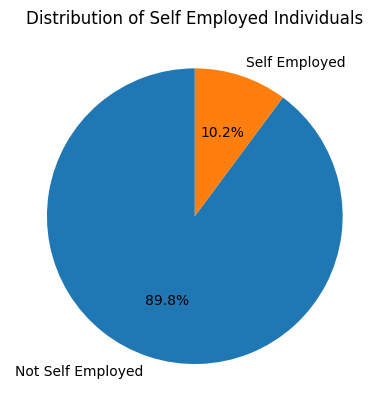

In [ ]:
self_employed_grouped = df.groupby('self_employed').size()

labels = ['Not Self Employed', 'Self Employed'] # ['No' 'Yes']

self_employed_grouped.plot.pie(labels=labels, autopct='%1.1f%%', startangle=90, subplots=False)
plt.title('Distribution of Self Employed Individuals')
# ignore y
plt.ylabel('')
plt.show()

This pie chart above aligns closely with estimates found online regarding the distribution of working adults between self-employment and non self-employment.


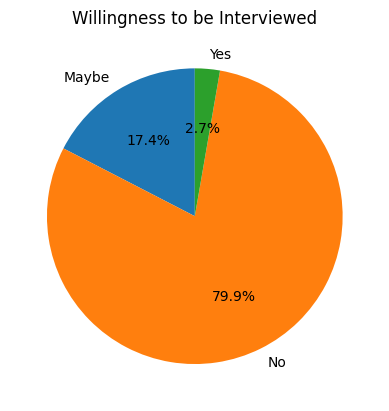

In [ ]:
interview_graph_grouped = df.groupby('mental_health_interview').size()

interview_graph_grouped.plot.pie(autopct='%1.1f%%', startangle=90)

plt.title('Willingness to be Interviewed')
plt.ylabel('')
plt.show()

Looking at the chart above and after one-hot encoding we realized mental_health_interview_no will be the outliers when using apirori. Since 'No' is 79.9% of the dataset, that means this will have a high-support count. Then the people with 'yes' are the outliers since they represent such a small part of our dataset.

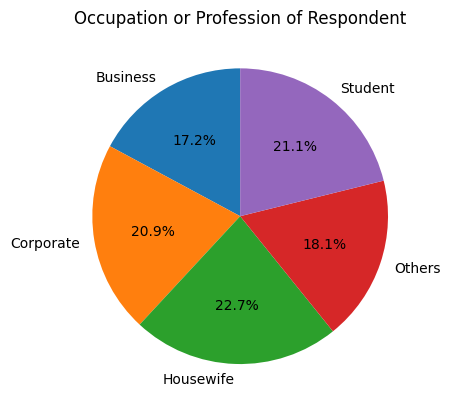

In [ ]:
ocupation_grouped = df.groupby('Occupation').size()

ocupation_grouped.plot.pie(autopct='%1.1f%%', startangle=90)

plt.title('Occupation or Profession of Respondent')
plt.ylabel('')
plt.show()

Looking at the chart above, we can see that these professions are evely distributed. Now, we will check to see if the 'Housewife' category has any males inside of it.

In [ ]:
males_as_housewives = df[(df['Occupation'] == 'Housewife') & (df['Gender'] == 'Male')]
males_as_housewives_count = males_as_housewives.shape[0]
print("Males as housewives: ", males_as_housewives_count)
num_rows, _ = df.shape
print("df shape: ", num_rows)

percentage = (males_as_housewives_count / num_rows) * 100
print("Percentage of rows that have a male 'Housewife': {:.2f}%".format(percentage))

Males as housewives:  53845
df shape:  287162
Percentage of rows that have a male 'Housewife': 18.75%


Due to there being males that are 'Housewife', we are changing the column name 'Housewife' to 'Homemaker' with the objective of having more precise language and prevent confusion. A homemaker can be either gender.

In [ ]:
df['Occupation'] = df['Occupation'].replace('Housewife', 'Homemaker')

homemakers_count = df[df['Occupation'] == 'Homemaker'].shape[0]
housewives_count = df[df['Occupation'] == 'Housewife'].shape[0]

print("Homemaker count: ", homemakers_count)
print("Housewive count: ", housewives_count)

Homemaker count:  65173
Housewive count:  0


In [ ]:
# Plot country on heat map using px
map_px = px.choropleth(df.groupby('Country').size().reset_index(name = 'count'),
                       locations='Country', locationmode='country names', color='count', # use count as intensity
                        color_continuous_scale='Greys',  title="Distribution of Respondents by Country on World Map")

map_px.update_layout(margin={"r": 10, "t": 40, "l": 10, "b": 40}, # margins with space for title
                        dragmode=False,
                        xaxis=dict(fixedrange=True),
                        yaxis=dict(fixedrange=True))
map_px.show()

# Feel free to hover over the countries - it gives you the exact number of respondents in said country.

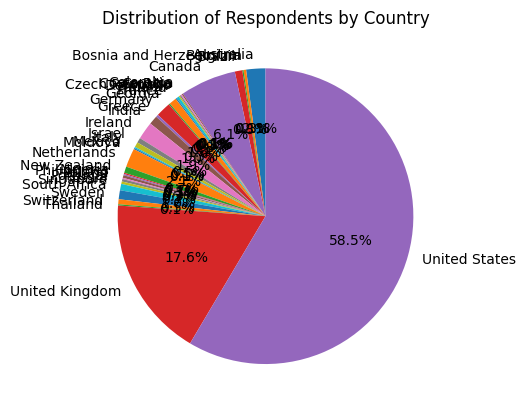

In [ ]:
country_grouped = df.groupby('Country').size()

country_grouped.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Respondents by Country')
plt.ylabel('')
plt.show()

From the two graphs above we found that the majority of respondents were in the United States.

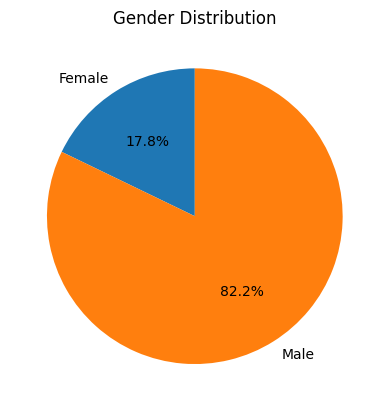

In [ ]:
country_grouped = df.groupby('Gender').size()

country_grouped.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

There are many more males than females. Male and female is an important category so instead of deleting it we will use our models on all people, then males and females separately.

### Feature Engineering - One-Hot Encoding


In [ ]:
df.head() # what it looks like before

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


In [ ]:
# ONE HOT ENCODING - Creating binary columns
binary_cols = []

# we will handle binary columns and non-binary columns differently.
non_binary_cols = {} # non binary column name : amount of unique values

for series_name, series in df.items():
    unique_vals = series.unique()
    if len(unique_vals) == 2: # will be handled as binary
        binary_cols.append(series_name)
    elif len(unique_vals) > 2: # non-binary, more than 2 categories
        non_binary_cols[series_name] = len(unique_vals)

print("Binary Column Labels:\n", binary_cols)

# print out all non-binary column names with their unique value
print("\nNon-binary column label : amount of unique values -> \n", non_binary_cols)

Binary Column Labels:
 ['Gender', 'self_employed', 'family_history', 'treatment', 'Coping_Struggles']

Non-binary column label : amount of unique values -> 
 {'Country': 35, 'Occupation': 5, 'Days_Indoors': 5, 'Growing_Stress': 3, 'Changes_Habits': 3, 'Mental_Health_History': 3, 'Mood_Swings': 3, 'Work_Interest': 3, 'Social_Weakness': 3, 'mental_health_interview': 3, 'care_options': 3}


First, let's apply the one hot encoding to binary variables and rename the binary variables.

In [ ]:
# pd.get_dummies() is key for one hot encoding
# handle binary_cols one hot encoding
# drop_first = True drops the first alphabetical category. e.g. Males and Females, females would be dropped

df = pd.get_dummies(df, columns = binary_cols, drop_first = True)

# name appropriately
column_renames = {
    'Gender_Male': 'is_male',
    'self_employed_Yes': 'is_self_employed',
    'family_history_Yes': 'has_family_history',
    'treatment_Yes': 'has_received_treatment',
    'Coping_Struggles_Yes': 'has_coping_struggles'
}

df.rename(columns=column_renames, inplace=True)
df.head()

,Country,Occupation,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Work_Interest,Social_Weakness,mental_health_interview,care_options,is_male,is_self_employed,has_family_history,has_received_treatment,has_coping_struggles
3,United States,Corporate,1-14 days,Yes,No,Yes,Medium,No,Yes,Maybe,Yes,False,False,True,True,False
4,United States,Corporate,1-14 days,Yes,No,Yes,Medium,No,Yes,No,Yes,False,False,True,True,False
5,Poland,Corporate,1-14 days,Yes,No,Yes,Medium,No,Yes,Maybe,Not sure,False,False,False,True,False
6,Australia,Corporate,1-14 days,Yes,No,Yes,Medium,No,Yes,No,Not sure,False,False,True,True,False
7,United States,Corporate,1-14 days,Yes,No,Yes,Medium,No,Yes,No,No,False,False,False,False,False


All the binary columns are now one hot encoded with appropriate names as seen above. Now we must deal with the non-binary variables.

According to our research, the general consensus for one-hot encoding categorical variables is that it works well unless said categorical variable has a large number of values (typically speaking no more than 15 different values).

Knowing this, there are 35 countries available and we cannot have 35 new columns. We will one-hot encode all the other columns since they range from 3 to 5 in length. Then, we will address what to do with the countries column.

(Refer to above, we printed the dictionary of non-binary column labels and their corresponding unique value amount.)

In [ ]:
# handle all non-binary columns ranging from 3 to 5 (all non-binary columns except 'Countries')
non_binary_to_encode = {k: v for k, v in non_binary_cols.items() if v <= 5}
df = pd.get_dummies(df, columns=list(non_binary_to_encode.keys()), drop_first=False)
df.head()

,Country,is_male,is_self_employed,has_family_history,has_received_treatment,has_coping_struggles,Occupation_Business,Occupation_Corporate,Occupation_Homemaker,Occupation_Others,...,Work_Interest_Yes,Social_Weakness_Maybe,Social_Weakness_No,Social_Weakness_Yes,mental_health_interview_Maybe,mental_health_interview_No,mental_health_interview_Yes,care_options_No,care_options_Not sure,care_options_Yes
3,United States,False,False,True,True,False,False,True,False,False,...,False,False,False,True,True,False,False,False,False,True
4,United States,False,False,True,True,False,False,True,False,False,...,False,False,False,True,False,True,False,False,False,True
5,Poland,False,False,False,True,False,False,True,False,False,...,False,False,False,True,True,False,False,False,True,False
6,Australia,False,False,True,True,False,False,True,False,False,...,False,False,False,True,False,True,False,False,True,False
7,United States,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,True,False,True,False,False


Our goal is to determine if we can predict or identify correlations using the 'Occupation' label as our starting point. With 40 columns available for use, as noted above, one-hot encoding could nearly double our feature space. We considered several feature engineering techniques, including dimensionality reduction and clustering similar categories (such as combining all European countries). However, after evaluating these options, we ultimately decided to omit this column from our analysis.

*We have chosen to omit the 'Country' column.*

In [ ]:
# drop the column
df = df.drop(columns=['Country'])
ap_df = df.copy()
ap_df.head()

,is_male,is_self_employed,has_family_history,has_received_treatment,has_coping_struggles,Occupation_Business,Occupation_Corporate,Occupation_Homemaker,Occupation_Others,Occupation_Student,...,Work_Interest_Yes,Social_Weakness_Maybe,Social_Weakness_No,Social_Weakness_Yes,mental_health_interview_Maybe,mental_health_interview_No,mental_health_interview_Yes,care_options_No,care_options_Not sure,care_options_Yes
3,False,False,True,True,False,False,True,False,False,False,...,False,False,False,True,True,False,False,False,False,True
4,False,False,True,True,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,False,True
5,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,True,False,False,False,True,False
6,False,False,True,True,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,True,False
7,False,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,True,False,True,False,False


In [ ]:
# verify that we dropped it
cols = df.columns # get all cols
print(cols) # print all cols

if 'Country' in cols:
    print("\n'Country' column is present in columns.")
else:
    print("\n'Country' column is no longer in columns.")
df.head()

Index(['is_male', 'is_self_employed', 'has_family_history',
       'has_received_treatment', 'has_coping_struggles', 'Occupation_Business',
       'Occupation_Corporate', 'Occupation_Homemaker', 'Occupation_Others',
       'Occupation_Student', 'Days_Indoors_1-14 days',
       'Days_Indoors_15-30 days', 'Days_Indoors_31-60 days',
       'Days_Indoors_Go out Every day', 'Days_Indoors_More than 2 months',
       'Growing_Stress_Maybe', 'Growing_Stress_No', 'Growing_Stress_Yes',
       'Changes_Habits_Maybe', 'Changes_Habits_No', 'Changes_Habits_Yes',
       'Mental_Health_History_Maybe', 'Mental_Health_History_No',
       'Mental_Health_History_Yes', 'Mood_Swings_High', 'Mood_Swings_Low',
       'Mood_Swings_Medium', 'Work_Interest_Maybe', 'Work_Interest_No',
       'Work_Interest_Yes', 'Social_Weakness_Maybe', 'Social_Weakness_No',
       'Social_Weakness_Yes', 'mental_health_interview_Maybe',
       'mental_health_interview_No', 'mental_health_interview_Yes',
       'care_options_No', 

,is_male,is_self_employed,has_family_history,has_received_treatment,has_coping_struggles,Occupation_Business,Occupation_Corporate,Occupation_Homemaker,Occupation_Others,Occupation_Student,...,Work_Interest_Yes,Social_Weakness_Maybe,Social_Weakness_No,Social_Weakness_Yes,mental_health_interview_Maybe,mental_health_interview_No,mental_health_interview_Yes,care_options_No,care_options_Not sure,care_options_Yes
3,False,False,True,True,False,False,True,False,False,False,...,False,False,False,True,True,False,False,False,False,True
4,False,False,True,True,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,False,True
5,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,True,False,False,False,True,False
6,False,False,True,True,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,True,False
7,False,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,True,False,True,False,False


## Modeling

### Neural Network (Classification)

We will use a multilayer perceptron neural network to detect our one-hot encoded label of 'Occupation'. This is an appropriate choice for supervised
learning tasks where there is labeled data with fixed categories. So, it is perfect for our use case.

In [ ]:
# imports for neural network
import torch
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
# SAVE THE CLEAN DF before tampering with it, we can restore from here later
clean_df = df.copy()

##### **Step 1: Prepare Data**
We will prepare the DataLoader objects for efficient batch processing during training and testing.

In [ ]:
# list of all of the one hot encoded columns derived from occupation
label_columns = ['Occupation_Business', 'Occupation_Corporate', 'Occupation_Homemaker', 'Occupation_Others', 'Occupation_Student']

# drop label cols of df, isolating features (aka input variables)
X = df.drop(label_columns, axis=1).values # .values convers df to a np arr
y = df[label_columns].values # isolate labels as a np arr

# convert numpy arrs to PyTorch tensors - need this for processing with PyTorch models
X = torch.tensor(X, dtype=torch.float32) # dtype is NEEDED, training will not start without this
y = torch.tensor(y, dtype=torch.float32)

# split the dataset into training and testing
# chose a 80/20 split, ~RNG is set to 888
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=888)



# create DataLoader for batch processing
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# shuffling training data is good because it helps prevent model from learning any order-specific weaknesses
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True) # batch size at 64 is universally agreeable
# we want to test consistently, so we do NOT shuffle (random state already on top)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

##### **Step 2: Define the Neural Network Architecture and Create It**

In [ ]:
'''
This is a feed-forward neural network aka a multilayer perceptron. This is an appropriate choice for supervised
learning tasks where there is labeled data with fixed categories. So, it is perfect for our use case.

input_dim -> number of input features the model expects. must match the # of features in our dataset

output_dim -> number of output neurons. This is equal to our labels, so 5. Each output neuron corresponds to
a class. This neuron's activation will be used to see accuracy percentages / confidence levels.

!!! 128 and 64 are parameters to be tunes. These are hyperparameters that control the size of the hidden layers !!!
These could affect:
-Overfitting vs Underfitting
-Computer Resources. Large networks require a lot of resources.
-Can form more complex patterns (but, again, can be vulnerable to overfitting)
'''
class OccupationClassifier(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(OccupationClassifier, self).__init__()
        # 128 is the number of neurons in the first hidden layer. the second layer also takes this output, and
        # uses it as input
        neuron_num_first_to_second = 128
        self.fc1 = nn.Linear(input_dim, neuron_num_first_to_second) # FIRST fully connected layer

        neuron_num_second_to_third = 64
        # 128 again shows that the second layer takes the output of the first layer as its input
        # which is 128 elements as defined in the first layer
        self.fc2 = nn.Linear(neuron_num_first_to_second, neuron_num_second_to_third) # SECOND fully connected layer

        self.fc3 = nn.Linear(neuron_num_second_to_third, output_dim) # OUTPUT layer

    def forward(self, x):
        x = F.relu(self.fc1(x)) # ReLU activation after 1st layer
        x = F.relu(self.fc2(x)) # ReLU activation after 2nd layer
        x = self.fc3(x) # linear output
        return x

# create class/model
# shape[0] is number of rows, shape[1] is number of cols (or, the number of labels)
model = OccupationClassifier(input_dim=X_train.shape[1], output_dim=y_train.shape[1])

##### **Step 3: Training the Model**

In [ ]:
# both can be experimented with
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


def train_model(model, train_loader, criterion, optimizer, num_epochs=30):
    model.train()  # start TRAINING MODE !
    for epoch in range(num_epochs): # iterate through all epochs
        for inputs, labels in train_loader: # for all epochs, go through all our target labels
            optimizer.zero_grad()           # clear existing gradients every iteration of a new label
            outputs = model(inputs)         # forward pass
            loss = criterion(outputs, torch.max(labels, 1)[1])  # compute loss
            loss.backward()                 # backward pass
            optimizer.step()                # update weights
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# an epoch is a complete pass through of the dataset. every time an epoch happens, the model's parameters
# are updated (such as the weights). goal is always to minimize loss function

# train the model
train_model(model, train_loader, criterion, optimizer)

Epoch 1, Loss: 0.13892915844917297
Epoch 2, Loss: 0.013022840954363346
Epoch 3, Loss: 0.012726766988635063
Epoch 4, Loss: 0.003146849572658539
Epoch 5, Loss: 0.004513941705226898
Epoch 6, Loss: 0.0009339922689832747
Epoch 7, Loss: 0.0004335109842941165
Epoch 8, Loss: 0.0004467416147235781
Epoch 9, Loss: 0.020840778946876526
Epoch 10, Loss: 0.0006931709940545261
Epoch 11, Loss: 0.01649305410683155
Epoch 12, Loss: 0.03304746747016907
Epoch 13, Loss: 0.06377286463975906
Epoch 14, Loss: 0.0001387174561386928
Epoch 15, Loss: 0.019742703065276146
Epoch 16, Loss: 0.041324857622385025
Epoch 17, Loss: 0.00035808514803647995
Epoch 18, Loss: 0.06781832128763199
Epoch 19, Loss: 0.020933400839567184
Epoch 20, Loss: 0.040764376521110535
Epoch 21, Loss: 2.5715509764268063e-05
Epoch 22, Loss: 0.012124140746891499
Epoch 23, Loss: 0.048307154327631
Epoch 24, Loss: 4.646059824153781e-05
Epoch 25, Loss: 1.7143820514320396e-05
Epoch 26, Loss: 8.767829422140494e-05
Epoch 27, Loss: 2.7151771064382046e-05
Epo

##### **Step 4: Evaluate the Model (Get the Accuracy)**

In [ ]:
# get accuracy
def evaluate_model(model, test_loader):
    model.eval()  # i choose you, EVALUATION MODE !
    total_correct = 0 # correct prediction counter
    total_samples = 0 # total predictions counter
    # gradient is no longer needed, reduces memory consumption and is only necessary during training.
    with torch.no_grad():
        for inputs, labels in test_loader: # iterate over the batches of date in the test loader
            outputs = model(inputs) # forward pass again, calculate predicted outputs by passing inputs to the model
            # represents the predicted class labels because each index corresponds to a class (aka a label for our occupation types)
            _, predicted = torch.max(outputs, 1) # predicted gets indices of max value
            # converting one-hot encoded labels into single integer 'class' labels.
            # we do this by finding the index of the max value in each label vector. this represents a class number (aka an occupation)
            _, labels = torch.max(labels, 1)
            total_correct += (predicted == labels).sum().item() # sum up correct preds.
            total_samples += labels.size(0) # count total preds.
    accuracy = total_correct / total_samples
    print(f'Test Accuracy: {accuracy * 100:.6f}%')
    return accuracy

# get the accuracy using our evaluate_model function
evaluate_model(model, test_loader)

Test Accuracy: 98.237947%


0.9823794682499608

This neural network achieved an accuracy of 98%. To ensure that these results are reliable, we will use K-fold (5) validation.

##### **Step 5: K-Folds**

In [ ]:
from sklearn.model_selection import KFold

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=888)

results = []

# k-folds cross validation loop
for fold, (train_i, test_i) in enumerate(kf.split(X)):
    # split the data
    X_train, X_test = X[train_i], X[test_i]
    y_train, y_test = y[train_i], y[test_i]

    # create DataLoaders for each fold
    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

    # create the model and training components again
    model = OccupationClassifier(input_dim=X_train.shape[1], output_dim=y_train.shape[1])
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # train model
    print(f"Training fold {fold+1}/{k}")
    train_model(model, train_loader, criterion, optimizer, num_epochs=30)

    # test the model
    print(f"Evaluating fold {fold+1}/{k}")
    accuracy = evaluate_model(model, test_loader)
    results.append(accuracy)
    print(f'Fold {fold+1}, Test Accuracy: {accuracy * 100:.6f}%')

# Average accuracy across all folds
average_accuracy = np.mean(results)
print(f'Average accuracy across all folds: {average_accuracy * 100:.2f}%')

Training fold 1/5
Epoch 1, Loss: 0.10263688117265701
Epoch 2, Loss: 0.09029481559991837
Epoch 3, Loss: 0.05115160346031189
Epoch 4, Loss: 0.05162762105464935
Epoch 5, Loss: 0.0024170733522623777
Epoch 6, Loss: 0.0018140791216865182
Epoch 7, Loss: 0.0514044389128685
Epoch 8, Loss: 0.04474194347858429
Epoch 9, Loss: 0.048755910247564316
Epoch 10, Loss: 0.017115861177444458
Epoch 11, Loss: 0.03146479278802872
Epoch 12, Loss: 0.01603204570710659
Epoch 13, Loss: 0.00015430536586791277
Epoch 14, Loss: 0.05019912123680115
Epoch 15, Loss: 0.00034040879108943045
Epoch 16, Loss: 0.01023850031197071
Epoch 17, Loss: 0.052120573818683624
Epoch 18, Loss: 7.641234697075561e-05
Epoch 19, Loss: 0.0549016110599041
Epoch 20, Loss: 0.016725841909646988
Epoch 21, Loss: 0.0001223387662321329
Epoch 22, Loss: 3.13514938170556e-05
Epoch 23, Loss: 0.06078629195690155
Epoch 24, Loss: 5.245135980658233e-06
Epoch 25, Loss: 0.018532127141952515
Epoch 26, Loss: 0.05316150560975075
Epoch 27, Loss: 2.443545417918358e-

After using 5-fold cross-validation, we see a very high accuracy average of 98.24%.

We tuned hyperparameters to get different results such as changing the number of epochs, Adam, etc.


##### **Confusion Matrix**

In [ ]:
# trying to find out why accuracy is so high
from sklearn.metrics import confusion_matrix, classification_report

def evaluate_detailed(model, loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            _, labels = torch.max(labels, 1)
            all_preds.extend(predicted.numpy())
            all_labels.extend(labels.numpy())
    print("Classification Report:")
    print(classification_report(all_labels, all_preds))

    print("Confusion Matrix:")
    print(confusion_matrix(all_labels, all_preds))


evaluate_detailed(model, test_loader)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9787
           1       0.97      0.98      0.98     12078
           2       0.99      0.97      0.98     13095
           3       0.99      0.98      0.99     10358
           4       0.98      0.99      0.99     12114

    accuracy                           0.98     57432
   macro avg       0.98      0.98      0.98     57432
weighted avg       0.98      0.98      0.98     57432

Confusion Matrix:
[[ 9637    28     0    25    97]
 [  128 11875    72     3     0]
 [    0   155 12704   116   120]
 [    0   118     0 10195    45]
 [   48    24     0     0 12042]]


Overall, the high values across precision, recall, and F1-scores indicate that the model has a strong performance in classifying instances across all occupations.

### **Decision Tree (Feature Importance Analysis & Classification)**
We will use decision trees for both classification and feature importance analysis.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import metrics, tree

We will now reconstruct the data in order to feed it into a decision tree.

In [ ]:
x_df = og_df.copy()

# ensure 'occ_df' is correctly prepared before concatenation and clean similarly to above
occ_df = og_df.copy()
occ_df = occ_df.dropna(subset=['self_employed'])
occ_df = occ_df[['Occupation']]  # ensure this is a df

# concatenate 'x_df' with 'occ_df' to combine features and the target into a single DataFrame
dt_df = pd.concat([x_df, occ_df], axis=1)

# drop one-hot encoded occupation label as not needed here
dt_df = dt_df.drop(['Occupation_Corporate', 'Occupation_Homemaker', 'Occupation_Others', 'Occupation_Student', 'Occupation_Business'], axis=1)

# ensure the split by 'is_male' and column drop are correctly handled
dtm = dt_df[dt_df['is_male'] == True].drop('is_male', axis=1) # male df
dtf = dt_df[dt_df['is_male'] == False].drop('is_male', axis=1) # female df



In [ ]:
# prepare data for a train/test split
X = dtm.drop('Occupation', axis=1)
Y = dtm['Occupation']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train) # fit classifier on training data

# make a prediction
pred = clf.predict(X_test)

print('Male Decision Tree\n\n')
print('Accuracy: ', metrics.accuracy_score(Y_test, pred))

importance = clf.feature_importances_
features = X.columns.tolist()
# Combine feature names and importances into a list of tuples
feature_importance_tuples = [(feature, importance) for feature, importance in zip(features, importance)]

# Sort the list of tuples based on the importance score (ascending order)
feature_importance_tuples_sorted = sorted(feature_importance_tuples, key=lambda x: x[1])

# Print the features in order from least important to most important
for feature, importance in feature_importance_tuples_sorted:
    print('Feature:', feature, 'Importance:', importance)

Male Decision Tree


Accuracy:  0.9787454969273152
Feature: Mood_Swings_Medium Importance: 0.0
Feature: mental_health_interview_No Importance: 1.3366839637943302e-05
Feature: mental_health_interview_Yes Importance: 1.3940168852225047e-05
Feature: mental_health_interview_Maybe Importance: 1.8491685416754803e-05
Feature: care_options_No Importance: 2.021716801952886e-05
Feature: is_self_employed Importance: 2.575935062701153e-05
Feature: care_options_Yes Importance: 3.2362919344578465e-05
Feature: care_options_Not sure Importance: 3.3276035261143036e-05
Feature: has_family_history Importance: 4.245473555866942e-05
Feature: has_received_treatment Importance: 4.75683467248501e-05
Feature: Mood_Swings_Low Importance: 0.005598369153284315
Feature: Mood_Swings_High Importance: 0.009168193168887133
Feature: Changes_Habits_Yes Importance: 0.018462120069666937
Feature: Changes_Habits_No Importance: 0.025238992968845266
Feature: Growing_Stress_No Importance: 0.026313336915563836
Feature: Mental_H

In [ ]:
# prepare data for a train/test split
X = dtf.drop('Occupation', axis=1)
Y = dtf['Occupation']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train) # fit classifier on training data

pred = clf.predict(X_test)

print('Female Decision Tree\n\n')
print('Accuracy: ', metrics.accuracy_score(Y_test, pred))

importance = clf.feature_importances_
features = X.columns.tolist()

# Combine feature names and importances into a list of tuples
feature_importance_tuples = [(feature, importance) for feature, importance in zip(features, importance)]

# Sort the list of tuples based on the importance score (ascending order)
feature_importance_tuples_sorted = sorted(feature_importance_tuples, key=lambda x: x[1])

# Print the features in order from least important to most important
for feature, importance in feature_importance_tuples_sorted:
    print('Feature:', feature, 'Importance:', importance)

Female Decision Tree


Accuracy:  0.9806697256663087
Feature: mental_health_interview_Yes Importance: 2.610854034236138e-05
Feature: mental_health_interview_Maybe Importance: 3.2760954362066986e-05
Feature: care_options_Yes Importance: 3.852675727270892e-05
Feature: is_self_employed Importance: 4.1403308687253727e-05
Feature: mental_health_interview_No Importance: 5.347992345456417e-05
Feature: care_options_Not sure Importance: 7.054378141778428e-05
Feature: care_options_No Importance: 7.843564993085084e-05
Feature: has_family_history Importance: 9.052971589443356e-05
Feature: has_received_treatment Importance: 9.977856540301684e-05
Feature: Days_Indoors_Go out Every day Importance: 0.011818203380346448
Feature: Mental_Health_History_Yes Importance: 0.017442073442208356
Feature: Days_Indoors_15-30 days Importance: 0.02178847034251843
Feature: Days_Indoors_1-14 days Importance: 0.024708211932095075
Feature: Growing_Stress_No Importance: 0.027048663736287757
Feature: Mental_Health_Histor

###### **Feature Importance Findings**
We can see some patterns that can help us find which features are most important when predicting an individuals' *Occupation*.


**Top 5 Features for Males:**
1.   Difficulty Coping - Importance: 0.08999
2.   Days Indoors (15-30 days) - Importance: 0.07698
3.   Work Interest (Yes) - Importance: 0.06866
4.   Work Interest (No) - Importance: 0.06155
5.   Days Indoors (31-60 days) - Importance: 0.05846


**Bottom 5 Features for Males:**
1. Mood Swings (Medium) - Importance: 0.0
2. mental_health_interview_No - Importance: 0.0000134
3. mental_health_interview_Yes - Importance: 0.0000139
4. mental_health_interview_Maybe - Importance: 0.0000185
4. care_options_No - Importance: 0.0000202

**Top 5 Features for Females:**
1. Work Interest (Maybe) - Importance: 0.06522
2. Social Weakness (Maybe) - Importance: 0.06266
3. Growing Stress (Maybe) - Importance: 0.06239
4. Mood Swings (Medium) - Importance: 0.05938
5. Work Interest (No) - Importance: 0.05679

**Bottom 5 Features for Females:**
1. mental_health_interview_Yes - Importance: 0.0000261
2. mental_health_interview_Maybe - Importance: 0.0000328
3. Using mental health care options - Importance: 0.0000385
4. is_self_employed - Importance: 0.0000414
5. mental_health_interview_No - Importance: 0.0000535

**Observations**
*   The top features are different between genders, with males showing a higher emphasis on coping strategies and the amount of time spent indoors, while females show more sensitivity to their work interest and social weaknesses.
*   For females, features related to mood swings and social capabilities are more significant, indicating these may play a crucial role in the types of occupations held.
*   Appears as a significant predictor in both models (categorized as Yes/No/Maybe), highlighting the importance of how individuals feel about their work relative to their occupation.
*   Willingness to be interviewed about their mental health consistently was among the least important features for both genders, suggesting that direct questions about mental health may not be as predictive of occupation as other indirect indicators like work interest or coping strategies.

**Conclusion**
* The decision trees have highlighted that personal and behavioral features, including coping mechanisms, time spent indoors, and attitudes towards work, are significant predictors of occupations.




###### **Classification Findings**

We were able to predict both males and females very accurately at approximately 98% for both.



*   Male Decision Tree Accuracy: 97.87%
*   Female Decision Tree Accuracy: 98.07%





### **Apriori**

In this section, we will be using Apriori to determine association between the five possible occupations and the features that exist. We will run it normally, and then filter the results to keep only results that relate an occupation with features. Not feature to feature association.


Here are the following data distributions per occupation:                      
**Female  distribution**                                                   
 * Size of Occupation_Others list: 41745 , 0.176                                                  
 * Size of Occupation_Corporate list: 51425 , 0.217                                                  
 * Size of Occupation_Student list: 49005 , 0.207                                                  
 * Size of Occupation_Business list: 39930, , 0.169                                                  
 * Size of Occupation_Housewife list: 53845, 0.228                                                  

*Female Total: 235,950*

**Male distribution**

* Size of Occupation_Others list: 10148, 0.198                                                  
* Size of Occupation_Corporate list: 8732, 0.17                                                  
* Size of Occupation_Student list: 11682, 0.228                                                  
* Size of Occupation_Business list: 9322, 0.182                                                  
* Size of Occupation_Housewife list: 11328, 0.221                                                  

*Male Total: 51,212*







In [ ]:
# Drop the mental_health_interview due to outliers - not beneficial to us
ap_df = ap_df.drop(columns=['is_self_employed','mental_health_interview_Maybe', 'mental_health_interview_No', 'mental_health_interview_Yes' ])
apf_df = ap_df.loc[ap_df['is_male'] == False]
apf_df = apf_df.drop(columns=['is_male'])


apm_df = ap_df.loc[ap_df['is_male'] == True]
apm_df = apm_df.drop(columns=['is_male'])
apm_df.head()

,has_family_history,has_received_treatment,has_coping_struggles,Occupation_Business,Occupation_Corporate,Occupation_Homemaker,Occupation_Others,Occupation_Student,Days_Indoors_1-14 days,Days_Indoors_15-30 days,...,Mood_Swings_Medium,Work_Interest_Maybe,Work_Interest_No,Work_Interest_Yes,Social_Weakness_Maybe,Social_Weakness_No,Social_Weakness_Yes,care_options_No,care_options_Not sure,care_options_Yes
52524,True,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,True,True,False,False
52525,True,True,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,True,False,False,True
52526,False,True,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,True,False,False,True
52527,False,True,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,True,True,False,False
52528,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,True,True,False,False


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

#We try different min_support and min_confidence first
min_support_f = 0.15
min_confidence_f= 0.15

frequent_itemsets = apriori(apm_df, min_support=min_support_f, use_colnames=True)

# Print frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Mine association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence_f)

# Print association rules
print("Association Rules:")
print(rules)
print("\n")


Frequent Itemsets:
     support                                     itemsets
0   0.350413                         (has_family_history)
1   0.464463                     (has_received_treatment)
2   0.458974                       (has_coping_struggles)
3   0.169231                        (Occupation_Business)
4   0.217949                       (Occupation_Corporate)
..       ...                                          ...
65  0.156567  (care_options_No, Mental_Health_History_No)
66  0.151015        (Mood_Swings_Medium, care_options_No)
67  0.151015       (care_options_No, Work_Interest_Maybe)
68  0.157677          (care_options_No, Work_Interest_No)
69  0.154346     (care_options_No, Social_Weakness_Maybe)

[70 rows x 2 columns]
Association Rules:
                 antecedents               consequents  antecedent support  \
0   (has_received_treatment)      (has_family_history)            0.464463   
1       (has_family_history)  (has_received_treatment)            0.350413   
2     (ha

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

def apriori_func (gender_df) :
    # Assuming apm_df is your dataframe containing "Yes" and "No" values
    # Convert Yes to 1 and No to 0
    ap_df_binary = gender_df.replace({"True": 1, "False": 0})

    # Set minimum support and confidence
    # This is the min_support & min_conf where can shows the occupation label
    min_support_m = 0.05
    min_confidence_m = 0.5

    # Apply Apriori algorithm
    frequent_itemsets = apriori(ap_df_binary, min_support = min_support_m, use_colnames=True)

    # Print frequent itemsets
    print("Frequent Itemsets:")
    print(frequent_itemsets)
    #print(frequent_itemsets.iloc [381 :])


     # Mine association rules
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence_m)

    #
     # Print association rules
    print("Association Rules:")
    print(rules )
    print("\n")



    return rules

rules_m = apriori_func (apm_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Frequent Itemsets:
      support                                           itemsets
0    0.350413                               (has_family_history)
1    0.464463                           (has_received_treatment)
2    0.458974                             (has_coping_struggles)
3    0.169231                              (Occupation_Business)
4    0.217949                             (Occupation_Corporate)
..        ...                                                ...
895  0.051079  (care_options_No, Social_Weakness_Maybe, Work_...
896  0.051079  (Social_Weakness_No, care_options_No, Work_Int...
897  0.053299  (care_options_No, Work_Interest_No, Social_Wea...
898  0.054410  (care_options_No, Work_Interest_No, Social_Wea...
899  0.052346  (care_options_Yes, has_received_treatment, has...

[900 rows x 2 columns]
Association Rules:
                                           antecedents  \
0                             (has_received_treatment)   
1                                 (has_fam

In [ ]:
rules_m.antecedents.values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array([frozenset({'has_received_treatment'}),
       frozenset({'has_family_history'}), frozenset({'care_options_Yes'}),
       frozenset({'Occupation_Business'}),
       frozenset({'Occupation_Student'}),
       frozenset({'Days_Indoors_31-60 days'}),
       frozenset({'Days_Indoors_Go out Every day'}),
       frozenset({'Changes_Habits_No'}),
       frozenset({'has_coping_struggles', 'has_received_treatment'}),
       frozenset({'has_coping_struggles', 'has_family_history'}),
       frozenset({'Occupation_Corporate', 'has_received_treatment'}),
       frozenset({'Occupation_Corporate', 'has_family_history'}),
       frozenset({'has_received_treatment', 'Occupation_Homemaker'}),
       frozenset({'has_family_history', 'Occupation_Homemaker'}),
       frozenset({'Occupation_Student', 'has_received_treatment'}),
       frozenset({'Occupation_Student', 'has_family_history'}),
       frozenset({'has_received_treatment', 'Days_Indoors_1-14 days'}),
       frozenset({'has_family_history', '

In [ ]:
rules_m[rules_m.antecedents.apply(lambda x: any([y.lower().startswith('occupation') for y in x]))]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(Occupation_Business),(has_coping_struggles),0.169231,0.458974,0.087179,0.515152,1.122397,0.009507,1.115865,0.131264
4,(Occupation_Student),(has_coping_struggles),0.207692,0.458974,0.107692,0.518519,1.129733,0.012367,1.123669,0.144938
10,"(Occupation_Corporate, has_received_treatment)",(has_family_history),0.101229,0.350413,0.053677,0.530249,1.513211,0.018205,1.382832,0.377353
11,"(Occupation_Corporate, has_family_history)",(has_received_treatment),0.076372,0.464463,0.053677,0.702830,1.513211,0.018205,1.802125,0.367197
12,"(has_received_treatment, Occupation_Homemaker)",(has_family_history),0.105993,0.350413,0.056203,0.530249,1.513211,0.019061,1.382832,0.379363
13,"(has_family_history, Occupation_Homemaker)",(has_received_treatment),0.079966,0.464463,0.056203,0.702830,1.513211,0.019061,1.802125,0.368632
14,"(Occupation_Student, has_received_treatment)",(has_family_history),0.096465,0.350413,0.051151,0.530249,1.513211,0.017348,1.382832,0.375363
15,"(Occupation_Student, has_family_history)",(has_received_treatment),0.072778,0.464463,0.051151,0.702830,1.513211,0.017348,1.802125,0.365774
61,"(Occupation_Student, has_received_treatment)",(has_coping_struggles),0.096465,0.458974,0.050019,0.518519,1.129733,0.005744,1.123669,0.127095
83,"(has_coping_struggles, Occupation_Student)",(Mood_Swings_High),0.107692,0.307692,0.053846,0.500000,1.625000,0.020710,1.384615,0.431034


In [ ]:
rules_m[rules_m.antecedents.apply(lambda x: x in ['Occupation_Business'])]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


**Below is Apirori for female dataset**

In [ ]:
rules_f = apriori_func (apf_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Frequent Itemsets:
       support                                           itemsets
0     0.601695                               (has_family_history)
1     0.686441                           (has_received_treatment)
2     0.532258                             (has_coping_struggles)
3     0.182028                              (Occupation_Business)
4     0.170507                             (Occupation_Corporate)
...        ...                                                ...
1486  0.051023  (care_options_Yes, has_coping_struggles, has_r...
1487  0.063969  (Social_Weakness_No, care_options_Yes, has_cop...
1488  0.060923  (care_options_Yes, has_coping_struggles, has_r...
1489  0.052546  (Growing_Stress_Yes, care_options_Yes, Mental_...
1490  0.050262  (Social_Weakness_No, care_options_Yes, Mental_...

[1491 rows x 2 columns]
Association Rules:
                                            antecedents  \
0                              (has_received_treatment)   
1                          

In [ ]:
rules_f.antecedents.values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array([frozenset({'has_received_treatment'}),
       frozenset({'has_family_history'}),
       frozenset({'has_coping_struggles'}), ...,
       frozenset({'care_options_Yes', 'Social_Weakness_Yes', 'has_received_treatment'}),
       frozenset({'care_options_Yes', 'Growing_Stress_Yes', 'Mental_Health_History_Maybe'}),
       frozenset({'Social_Weakness_No', 'care_options_Yes', 'Mental_Health_History_Maybe'})],
      dtype=object)

In [ ]:
rules_f[rules_f.antecedents.apply(lambda x: any([y.lower().startswith('occupation') for y in x]))]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(Occupation_Business),(has_family_history),0.182028,0.601695,0.109525,0.601695,1.000000,1.387779e-17,1.000000,1.549059e-16
5,(Occupation_Corporate),(has_family_history),0.170507,0.601695,0.102593,0.601695,1.000000,0.000000e+00,1.000000,0.000000e+00
6,(Occupation_Homemaker),(has_family_history),0.221198,0.601695,0.133094,0.601695,1.000000,0.000000e+00,1.000000,0.000000e+00
7,(Occupation_Others),(has_family_history),0.198157,0.601695,0.119230,0.601695,1.000000,1.387779e-17,1.000000,1.451596e-16
8,(Occupation_Student),(has_family_history),0.228111,0.601695,0.137253,0.601695,1.000000,0.000000e+00,1.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
954,"(care_options_Yes, has_family_history, Occupat...",(has_received_treatment),0.059986,0.686441,0.052488,0.875000,1.274691,1.131091e-02,2.508475,2.292480e-01
955,"(care_options_Yes, Occupation_Homemaker)","(has_family_history, has_received_treatment)",0.088104,0.491525,0.052488,0.595745,1.212032,9.182170e-03,1.257806,1.918415e-01
956,"(care_options_Yes, Occupation_Student, has_rec...",(has_family_history),0.075392,0.601695,0.054128,0.717949,1.193211,8.764663e-03,1.412173,1.751283e-01
957,"(care_options_Yes, Occupation_Student, has_fam...",(has_received_treatment),0.061861,0.686441,0.054128,0.875000,1.274691,1.166437e-02,2.508475,2.297061e-01


In [ ]:
rules_f[rules_f.antecedents.apply(lambda x: x in ['Occupation_Business'])]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


###### **Result**

 After running Apriori for this dataset, separating males and females, we found that the support count of the occupation labels is too low to find correlations with other features. This is mainly because the distribution of the occupations is quite even throughout the data for each gender. We observed that the lowest support was 16% for the occupation "business" in males. Therefore, we had to set the min_support to 0.05 in order to identify any potential correlations between occupation and other features. However, even with this adjustment, the support remains low, indicating that the occupation labels do not exhibit strong correlations with other features.

Upon examining the gender distribution, we found that males show more correlation with "has_coping_struggles" among both students and individuals working in business. In contrast, females across all occupations exhibit a higher correlation with "has_family_history" compared to other features.


## Conclusion



#### Comparing Classification: Multilayer Perceptron Neural Network vs. Decision Tree

For classification tasks, we used both a neural network and a decision tree. After tuning both, the highest accuracies we were able to get consistently are (on our main dataset with both genders combined):
*   Neural network: 98.24%
*   Decision tree: 98.10%
They both performed very well in this classification task. Neural network slightly outclasses the decision tree but by a small amount.


#### Comparing Associations: Feature Finding (Decision Trees) vs. Apriori

Using decision trees, we were able to pinpoint a few key features for each gender. We did a comparison in its section. One of the drawbacks for this feature was that it was too broad as it gave us indications for the entire occupation label and not the specific occupations.

The Apriori algorithm was then applied to discover frequent itemsets and association rules. However, forming solid conclusions was challenging due to the min_support values. Despite this limitation, some associations between features were identified, offering partial insights into the relationships between different factors.

In conclusion, while both methods provided insights, they also had their limitations. The decision tree analysis offered more concrete and reliable feature importance but lacked specificity regarding occupation labels. Conversely, the Apriori algorithm could identify correlations with occupation labels, but the use of min_support values limited the depth of conclusions that could be drawn.